In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
int_csv_path = "player_interceptions.csv"
NFL_Int = pd.read_csv(int_csv_path)
NFL_Int = NFL_Int.groupby(['intposition','playerid','namefirst','namelast'],as_index=False).sum()
NFL_Int = NFL_Int.groupby(['intposition','playerid']).max()
NFL_Int.sort_values(['int','intyards','inttd'],ascending=False).head(10)

namefirst   namelast  int  intyards  inttd
intposition playerid                                           
CB          20030120    Asante     Samuel   50       655      5
            20030005   Terence     Newman   50       443      4
FS          20160064     Kevin      Byard   44       740      0
S           20020024        Ed       Reed   42      1087      1
CB          20060758     Brent     Grimes   42       760      3
            20130036    Darius       Slay   42       456      0
            20040008  DeAngelo       Hall   41       918      5
            20060724    Tramon   Williams   41       518      3
            20060019   Antonio  Cromartie   40       775      1
FS          20070037      Eric     Weddle   40       640      7

In [3]:
NFL_Total_Int = NFL_Int.sort_values(['int'],ascending=False).head(10)
NFL_Total_Int

namefirst   namelast  int  intyards  inttd
intposition playerid                                           
CB          20030005   Terence     Newman   50       443      4
            20030120    Asante     Samuel   50       655      5
FS          20160064     Kevin      Byard   44       740      0
S           20020024        Ed       Reed   42      1087      1
CB          20060758     Brent     Grimes   42       760      3
            20130036    Darius       Slay   42       456      0
            20060724    Tramon   Williams   41       518      3
            20040008  DeAngelo       Hall   41       918      5
            20060019   Antonio  Cromartie   40       775      1
FS          20070037      Eric     Weddle   40       640      7

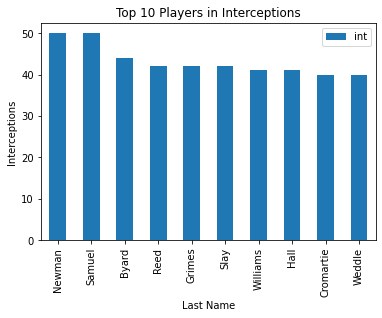

In [4]:
NFL_Total_Int.plot(x ='namelast', y='int', kind = 'bar')
plt.title('Top 10 Players in Interceptions')
plt.xlabel('Last Name')
plt.ylabel('Interceptions')
plt.savefig('Top_10_INT.png')

In [5]:
NFL_Total_Intyards = NFL_Int.sort_values(['intyards'],ascending=False).head(10)
NFL_Total_Intyards

namefirst   namelast  int  intyards  inttd
intposition playerid                                            
FS          20100014       Earl     Thomas   36      1109      7
S           20020024         Ed       Reed   42      1087      1
CB          20150018     Marcus     Peters   34      1080      6
            20120039    Janoris    Jenkins   32      1016     14
            20040008   DeAngelo       Hall   41       918      5
            20030039    Rashean     Mathis   32       841      8
            20060024  Johnathan     Joseph   29       785     11
            20060019    Antonio  Cromartie   40       775      1
            20060758      Brent     Grimes   42       760      3
FS          20160064      Kevin      Byard   44       740      0

In [6]:
NFL_Total_Inttd = NFL_Int.sort_values(['inttd'],ascending=False).head(10)
NFL_Total_Inttd


namefirst  namelast  int  intyards  inttd
intposition playerid                                           
CB          20120039    Janoris   Jenkins   32      1016     14
            20080020       Aqib     Talib   34       685     13
            20060024  Johnathan    Joseph   29       785     11
            20070170    William       Gay   17       393      9
ILB         20130030       Alec  Ogletree    8       356      8
CB          20030039    Rashean    Mathis   32       841      8
            20150972     Justin   Coleman   10       342      8
            20140129     Dontae   Johnson    7       260      7
            20090203      Jason  McCourty   32       739      7
FS          20100014       Earl    Thomas   36      1109      7

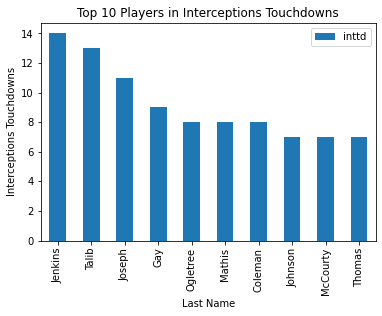

In [7]:
NFL_Total_Inttd.plot(x ='namelast', y='inttd', kind = 'bar')
plt.title('Top 10 Players in Interceptions Touchdowns')
plt.xlabel('Last Name')
plt.ylabel('Interceptions Touchdowns')
plt.savefig('Top_10_INTTD.png')

In [8]:
sacks_csv_path= "player_sacks.csv"
NFL_Sacks = pd.read_csv(sacks_csv_path)
NFL_Sacks

,playerid,namefirst,namelast,sackposition,sacktype,sackyards,sackend
0,20010230,Ross,Kolodziej,DE,1.0,-8,in bounds
1,19940004,Willie,McGinest,LB,1.0,0,in bounds
2,19940145,Rodney,Harrison,S,1.0,-6,in bounds
3,19940004,Willie,McGinest,LB,1.0,-9,in bounds
4,19940145,Rodney,Harrison,S,1.0,-15,in bounds
...,...,...,...,...,...,...,...
25959,20130049,Johnathan,Hankins,DT,0.5,-9,in bounds
25960,20190007,Josh,Allen,DE,0.5,-2,in bounds
25961,20140108,Cassius,Marsh,LB,0.5,-8,in bounds
25962,20160160,Kentrell,Brothers,LB,0.5,-6,in bounds


In [9]:
sackcount= NFL_Sacks['playerid'].value_counts()
sackcount= pd.DataFrame(sackcount)
sackcount= sackcount.rename(columns={'playerid':'sackcount'})
NFL_Sacks= NFL_Sacks.groupby('playerid').max()
NFL_Sacks = pd.merge(NFL_Sacks, sackcount, left_index=True, right_index=True )
NFL_Sacks = NFL_Sacks.reset_index()
NFL_Sacks = NFL_Sacks.rename(columns={'index':'playerid'})
NFL_Sacks

,playerid,namefirst,namelast,sackposition,sacktype,sackyards,sackend,sackcount
0,19890005,Deion,Sanders,CB,1.0,-5,in bounds,1
1,19900005,Junior,Seau,LB,1.0,-4,in bounds,9
2,19910020,Kelvin,Pritchett,DT,1.0,-4,in bounds,1
3,19910025,Ted,Washington,DT,1.0,0,in bounds,3
4,19910031,Roman,Phifer,LB,1.0,-6,in bounds,2
...,...,...,...,...,...,...,...,...
2309,20190989,Derick,Roberson,LB,1.0,-7,in bounds,10
2310,20190993,Ryan,Bee,LB,1.0,-5,in bounds,2
2311,20190995,Jonathan,Bonner,DE,0.5,-2,in bounds,2
2312,20191008,Aaron,Adeoye,LB,1.0,-8,in bounds,2


In [10]:
NFL_Sacks = NFL_Sacks.groupby(['sackposition','playerid','namefirst','namelast','sacktype','sackend','sackcount']).sum()
NFL_Sacks = NFL_Sacks.reset_index()
NFL_Sacks = NFL_Sacks.groupby(['sackposition','playerid']).max()
NFL_Sacks

namefirst  namelast  sacktype    sackend  sackcount  \
sackposition playerid                                                       
CB           19890005     Deion   Sanders       1.0  in bounds          1   
             19920007      Troy   Vincent       1.0  in bounds          1   
             19930162    Willie  Williams       1.0  in bounds          1   
             19950022    Tyrone     Poole       1.0  in bounds          1   
             19950023        Ty       Law       1.0  in bounds          1   
...                         ...       ...       ...        ...        ...   
SS           20180093    Ronnie  Harrison       1.0  in bounds          6   
TE           20060623    Dejuan   Skinner       0.5  in bounds          1   
WE           20000013      John   Abraham       1.0  in bounds         81   
             20040234    Trevor   Johnson       1.0  in bounds          7   
WR           20040420      Mike     Adams       1.0  in bounds          6   

                       sackyards  
sackposition playerid             
CB           19890005         -5  
             19920007        -11  
             19930162         -6  
             19950022         -9  
             19950023         -6  
...                          ...  
SS           20180093          0  
TE           20060623         -7  
WE           20000013          0  
             20040234          0  
WR           20040420         -5  

[2314 rows x 6 columns]

In [11]:
NFL_SackYards = NFL_Sacks.sort_values(['sackyards']).head(10)
NFL_SackYards

namefirst       namelast  sacktype    sackend  \
sackposition playerid                                                 
LB           20090230     Moise          Fokou       1.0  in bounds   
S            20020045      Tank       Williams       1.0  in bounds   
LB           20030508     Byron        Hardmon       1.0  in bounds   
CB           20130505     Jumal          Rolle       1.0  in bounds   
DT           20170633     Tueni      Lupeamanu       1.0  in bounds   
ILB          20090137     Jason       Phillips       1.0  in bounds   
S            20080086       Tom      Zbikowski       1.0  in bounds   
             20020041    Lamont       Thompson       1.0  in bounds   
DT           20030214     Keith         Wright       0.5  in bounds   
DE           20070058    Ikaika  Alama-Francis       1.0  in bounds   

                       sackcount  sackyards  
sackposition playerid                        
LB           20090230          3        -18  
S            20020045          1        -18  
LB           20030508          1        -17  
CB           20130505          3        -17  
DT           20170633          1        -17  
ILB          20090137          3        -17  
S            20080086          3        -17  
             20020041          1        -16  
DT           20030214          1        -16  
DE           20070058          1        -16

In [12]:
NFL_SackCount = NFL_Sacks.sort_values(['sackcount'],ascending= False).head(10)
NFL_SackCount

namefirst  namelast  sacktype               sackend  \
sackposition playerid                                                       
OLB          20030010   Terrell     Suggs       1.0  pushed out of bounds   
LB           20020002    Julius   Peppers       1.0             in bounds   
OLB          20090026      Clay  Matthews       1.0             in bounds   
LB           20050454   Cameron      Wake       1.0             in bounds   
             20050011  DeMarcus      Ware       1.0             in bounds   
OLB          20060126     Elvis  Dumervil       1.0             in bounds   
             20120021  Chandler     Jones       1.0             in bounds   
             20110070    Justin   Houston       1.0             in bounds   
DE           20110024   Cameron    Jordan       1.0             in bounds   
             20100100   Everson   Griffen       1.0             in bounds   

                       sackcount  sackyards  
sackposition playerid                        
OLB          20030010        197          0  
LB           20020002        152          0  
OLB          20090026        150          0  
LB           20050454        140          0  
             20050011        135          0  
OLB          20060126        133          0  
             20120021        132          0  
             20110070        130          0  
DE           20110024        126          0  
             20100100        119          0

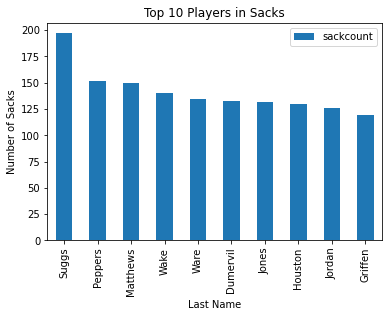

In [19]:
NFL_SackCount.plot(x ='namelast', y='sackcount', kind = 'bar')
plt.title('Top 10 Players in Sacks')
plt.xlabel('Last Name')
plt.ylabel('Number of Sacks')
plt.savefig('Top_10_Sacks.png')